In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [ ]:
# Load data and preprocess (same as before)
columns = ['Age', 'Gender', 'Medication', 'Test Results', 'Admission Type', 'Date of Admission', 'Discharge Date', 'Medical Condition', 'Hospital', 'Billing Amount']

df = pd.read_csv('F:/Work/--- My-Freelance-World/Python Dashboards - ChartJS/Onyx - DataDNA - Apr 2025/data/Healthcare Analysis Dataset.csv',  usecols=columns)

# Feature engineering (same as before)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Year'] = df['Date of Admission'].dt.year
df['Length of Stay'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days

# Define features
categorical_features = ['Medical Condition','Hospital', 'Gender', 'Admission Type', 'Medication']
# Add the feature
df['Billing per Day'] = df['Billing Amount'] / df['Length of Stay']
numerical_features = ['Billing Amount', 'Length of Stay', 'Billing per Day', 'Age']

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Prepare data matrix (numerical first, categorical second)
data_matrix = df[numerical_features + categorical_features].values
categorical_indices = list(range(len(numerical_features), len(numerical_features) + len(categorical_features)))
categorical_indice

Fitting K-Prototypes with K=2...
Fitting K-Prototypes with K=3...
Fitting K-Prototypes with K=4...
Fitting K-Prototypes with K=5...
Fitting K-Prototypes with K=6...
Fitting K-Prototypes with K=7...
Fitting K-Prototypes with K=8...
Fitting K-Prototypes with K=9...
Fitting K-Prototypes with K=10...


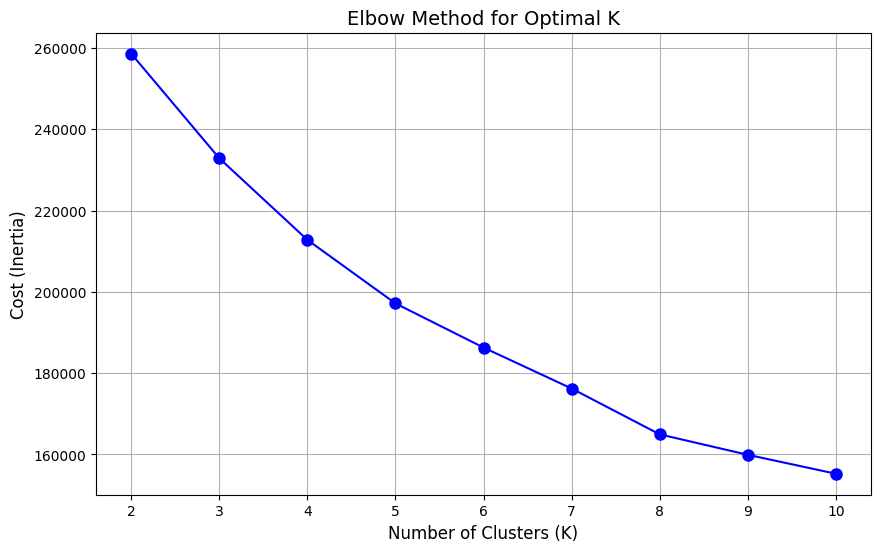

In [3]:
# ================================================
# Elbow Method for Optimal K
# ================================================
costs = []
k_values = range(2, 11)  # Test K from 2 to 10 clusters

for k in k_values:
    print(f"Fitting K-Prototypes with K={k}...")
    kp = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=0)
    kp.fit(data_matrix, categorical=categorical_indices)
    costs.append(kp.cost_)  # Store the cost (inertia)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Cost (Inertia)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [16]:
# ================================================
# Final Clustering with Best K (Example: K=5)
# ================================================
best_k = 6  # Choose based on elbow plot
kp_final = KPrototypes(n_clusters=best_k, init='Huang', verbose=2)
kp_final.fit(data_matrix, categorical=categorical_indices)
df['Cluster'] = kp_final.labels_

# ================================================
# Export Clustered Data to CSV
# ================================================
# (Optional) Add cluster labels to original data (without scaling)
df_unscaled = pd.read_csv('F:/Work/--- My-Freelance-World/Python Dashboards - ChartJS/Onyx - DataDNA - Apr 2025/data/Healthcare Analysis Dataset.csv')  # Reload original data
df_unscaled['Cluster'] = df['Cluster']  # Add cluster labels
df_unscaled.to_csv('clustered_patients.csv', index=False)  # Save to CSV

print("Clustered dataset saved to 'clustered_patients.csv'")

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 26621, ncost: 179030.23010735316
Run: 1, iteration: 2/100, moves: 8587, ncost: 174183.93220537042
Run: 1, iteration: 3/100, moves: 4954, ncost: 172425.3410897417
Run: 1, iteration: 4/100, moves: 3072, ncost: 171780.32736297674
Run: 1, iteration: 5/100, moves: 2250, ncost: 171368.65064424468
Run: 1, iteration: 6/100, moves: 1924, ncost: 171054.4703513126
Run: 1, iteration: 7/100, moves: 1601, ncost: 170826.738486687
Run: 1, iteration: 8/100, moves: 1339, ncost: 170654.13161851483
Run: 1, iteration: 9/100, moves: 1155, ncost: 170509.36870663625
Run: 1, iteration: 10/100, moves: 1064, ncost: 170386.56621350007
Run: 1, iteration: 11/100, moves: 1029, ncost: 170273.200893847
Run: 1, iteration: 12/100, moves: 904, ncost: 170199.85765203
Run: 1, iteration: 13/100, moves: 852, ncost: 170135.53081788754
Run: 1, iteration: 14/100, moves: 799, ncost: 170080.61056607324
Run: 1, iteratio

In [17]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'df' contains your clustered data with 'Cluster' column
# Numerical and categorical features should be defined as before

def evaluate_clusters(df, numerical_features, categorical_features):
    # Calculate metrics for all clusters (including noise if using DBSCAN)
    metrics = {}
    
    # 1. Silhouette Score (numerical features only as proxy)
    # Note: This is an approximation since K-Prototypes uses mixed distance
    metrics['Silhouette Score'] = silhouette_score(df[numerical_features], df['Cluster'])
    
    # 2. Davies-Bouldin Index (numerical features only)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(df[numerical_features],  df['Cluster'])
    
    # 3. Cluster Distribution
    cluster_dist = df['Cluster'].value_counts().sort_index()
    metrics['Cluster Distribution'] = cluster_dist
    metrics['Cluster Percentage'] = cluster_dist / len(df) * 100
    
    # 4. Numerical Feature Statistics
    numerical_summary = df.groupby('Cluster')[numerical_features].agg(['mean', 'std'])
    
    # 5. Categorical Feature Modes
    categorical_summary = {}
    for cat in categorical_features:
        categorical_summary[cat] = df.groupby('Cluster')[cat].agg(lambda x: x.mode()[0])
    
    return metrics, numerical_summary, categorical_summary

# Run evaluation
metrics, numerical_summary, categorical_summary = evaluate_clusters(df,  numerical_features, categorical_features)

# Print metrics
print("=== Key Metrics ===")
print(f"Silhouette Score: {metrics['Silhouette Score']:.3f}")
print(f"Davies-Bouldin Index: {metrics['Davies-Bouldin Index']:.3f}")
print("\nCluster Distribution:")
print(metrics['Cluster Distribution'])
print("\nCluster Percentage:")
print(metrics['Cluster Percentage'].round(2).astype(str) + "%")

# Print numerical summaries
print("\n=== Numerical Feature Summary ===")
print(numerical_summary)

# Print categorical summaries
print("\n=== Categorical Feature Modes ===")
for feature, summary in categorical_summary.items():
    print(f"\n{feature}:")
    print(summary)

# Optional: Create a consolidated report dataframe
report_df = numerical_summary.copy()
for feature, summary in categorical_summary.items():
    report_df[f"Most Common {feature}"] = summary.values

print("\n=== Consolidated Report ===")
print(report_df)

=== Key Metrics ===
Silhouette Score: 0.244
Davies-Bouldin Index: 1.104

Cluster Distribution:
Cluster
0    10319
1    11829
2    10068
3     1623
4    11487
5    10174
Name: count, dtype: int64

Cluster Percentage:
Cluster
0    18.59%
1    21.31%
2    18.14%
3     2.92%
4     20.7%
5    18.33%
Name: count, dtype: object

=== Numerical Feature Summary ===
        Billing Amount           Length of Stay           Billing per Day  \
                  mean       std           mean       std            mean   
Cluster                                                                     
0             0.605490  0.701683      -1.098378  0.357574        0.661144   
1            -0.948361  0.489590       0.077113  0.907762       -0.398883   
2             0.748145  0.585701       0.660950  0.667690       -0.258827   
3             0.824611  0.629723      -1.640491  0.053093        4.706413   
4            -0.960713  0.492522      -0.063415  0.893863       -0.381120   
5             0.701313  0.

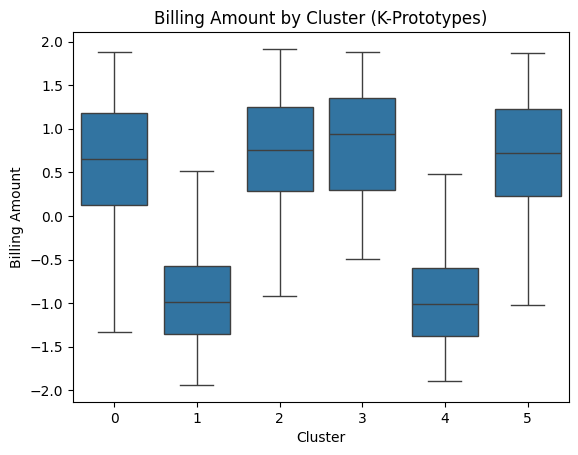

In [18]:
import seaborn as sns

# Visualize Billing Amount by cluster
sns.boxplot(x='Cluster', y='Billing Amount', data=df)
plt.title('Billing Amount by Cluster (K-Prototypes)')
plt.show()

In [19]:
# Check if high-billing clusters correlate with specific conditions
high_billing_clusters = df[df['Billing Amount'] > df['Billing Amount'].quantile(0.9)]
print(high_billing_clusters['Medical Condition'].value_counts())

Medical Condition
Hypertension    1431
Diabetes        1332
Obesity         1296
Cancer           593
Arthritis        495
Asthma           403
Name: count, dtype: int64


In [1]:
import pandas as pd

url = "F:/Work/--- My-Freelance-World/Python Dashboards - ChartJS/Onyx - DataDNA - Apr 2025/data/clustered_patients.csv"
df = pd.read_csv(url)

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Year'] = df['Date of Admission'].dt.year

df.Cluster += 1     # clusters will be 1-6

df['Cluster'] = df['Cluster'].apply(lambda x: 'Cluster ' + str(x) )


cluster_summary = df.groupby('Cluster').agg({
        'Age': 'mean',
        'Billing Amount': ['mean', 'std'],
        'Length of Stay': ['mean', 'std'],
        'Patient ID': 'count',
        'Medical Condition': lambda x: x.mode().iloc[0],
        'Medical Condition':lambda x: x.mode().iloc[0],
        'Medication': lambda x: x.mode().iloc[0],
        'Admission Type': lambda x: x.mode().iloc[0]
    }).reset_index()


cluster_summary

Cluster        Age Billing Amount              Length of Stay            \
                   mean           mean          std           mean       std   
0  Cluster 1  51.504022   34144.128834  9971.846690       5.997577  3.096418   
1  Cluster 2  68.691605   12061.850263  6957.718007      16.176769  7.860787   
2  Cluster 3  68.966627   36171.451110  8323.593953      21.232519  5.781876   
3  Cluster 4  50.630930   37258.137237  8949.203525       1.303142  0.459758   
4  Cluster 5  34.359885   11886.307012  6999.396803      14.959868  7.740426   
5  Cluster 6  33.929133   35505.898963  8838.325407      21.601926  5.692260   

  Patient ID Medical Condition   Medication Admission Type  
       count          <lambda>     <lambda>       <lambda>  
0      10319          Diabetes      Aspirin       Elective  
1      11829          Diabetes    Ibuprofen      Emergency  
2      10068      Hypertension   Penicillin         Urgent  
3       1623          Diabetes   Penicillin         Urgent  
4      11487      Hypertension      Aspirin       Elective  
5      10174          Diabetes  Paracetamol         Urgent

In [2]:
cluster_summary.columns = ['Cluster', 'Avg Age', 'Billing Avg', 'Billing Std', 'Length of Stay Avg', 'Length of Stay Std', 'Patient Count', 'Mode Medical Condition', 'Mode Medication', 'Mode Admission Type' ]

cluster_summary

,Cluster,Avg Age,Billing Avg,Billing Std,Length of Stay Avg,Length of Stay Std,Patient Count,Mode Medical Condition,Mode Medication,Mode Admission Type
0,Cluster 1,51.504022,34144.128834,9971.846690,5.997577,3.096418,10319,Diabetes,Aspirin,Elective
1,Cluster 2,68.691605,12061.850263,6957.718007,16.176769,7.860787,11829,Diabetes,Ibuprofen,Emergency
2,Cluster 3,68.966627,36171.451110,8323.593953,21.232519,5.781876,10068,Hypertension,Penicillin,Urgent
3,Cluster 4,50.630930,37258.137237,8949.203525,1.303142,0.459758,1623,Diabetes,Penicillin,Urgent
4,Cluster 5,34.359885,11886.307012,6999.396803,14.959868,7.740426,11487,Hypertension,Aspirin,Elective
5,Cluster 6,33.929133,35505.898963,8838.325407,21.601926,5.692260,10174,Diabetes,Paracetamol,Urgent


In [6]:
# Create a more detailed profile for each cluster
cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Length of Stay': ['mean', 'std'],
    'Billing Amount': ['mean', 'std', 'median'],
    'Patient ID': 'count',
    'Insurance Provider': lambda x: x.mode().iloc[0],
    'Medical Condition': lambda x: x.mode().iloc[0],
    'Admission Type': lambda x: x.mode().iloc[0],
    'Gender': lambda x: (x == 'Male').mean() * 100  # Percentage of males
}).reset_index()

# Flatten the column multi-index
cluster_profiles.columns = [f"{col[0]}_{col[1]}" if col[1] != '' else col[0] for col in cluster_profiles.columns]

cluster_profiles

,Cluster,Age_mean,Age_std,Length of Stay_mean,Length of Stay_std,Billing Amount_mean,Billing Amount_std,Billing Amount_median,Patient ID_count,Insurance Provider_<lambda>,Medical Condition_<lambda>,Admission Type_<lambda>,Gender_<lambda>
0,Cluster 1,51.504022,17.509662,5.997577,3.096418,34144.128834,9971.846690,34809.679040,10319,Medicare,Diabetes,Elective,40.139548
1,Cluster 2,68.691605,10.180668,16.176769,7.860787,12061.850263,6957.718007,11532.655070,11829,Medicare,Diabetes,Emergency,40.206273
2,Cluster 3,68.966627,9.976165,21.232519,5.781876,36171.451110,8323.593953,36285.611725,10068,Medicare,Hypertension,Urgent,39.779499
3,Cluster 4,50.630930,19.754129,1.303142,0.459758,37258.137237,8949.203525,38967.475650,1623,Medicare,Diabetes,Urgent,41.836106
4,Cluster 5,34.359885,10.193147,14.959868,7.740426,11886.307012,6999.396803,11203.817460,11487,Medicare,Hypertension,Elective,40.027858
5,Cluster 6,33.929133,10.031524,21.601926,5.692260,35505.898963,8838.325407,35843.066995,10174,Medicare,Diabetes,Urgent,39.512483


In [7]:
# Sort by risk (combination of LOS and billing)
cluster_profiles['Risk_Score'] = (
    (cluster_profiles['Billing Amount_mean'] / cluster_profiles['Billing Amount_mean'].max()) * 0.7 + 
    (cluster_profiles['Length of Stay_mean'] / cluster_profiles['Length of Stay_mean'].max()) * 0.3
)
cluster_profiles['Risk_Category'] = pd.qcut(cluster_profiles['Risk_Score'], 3, labels=['Low', 'Medium', 'High'])
cluster_profiles = cluster_profiles.sort_values('Risk_Score', ascending=False)
cluster_profiles

,Cluster,Age_mean,Age_std,Length of Stay_mean,Length of Stay_std,Billing Amount_mean,Billing Amount_std,Billing Amount_median,Patient ID_count,Insurance Provider_<lambda>,Medical Condition_<lambda>,Admission Type_<lambda>,Gender_<lambda>,Risk_Score,Risk_Category
2,Cluster 3,68.966627,9.976165,21.232519,5.781876,36171.451110,8323.593953,36285.611725,10068,Medicare,Hypertension,Urgent,39.779499,0.974453,High
5,Cluster 6,33.929133,10.031524,21.601926,5.692260,35505.898963,8838.325407,35843.066995,10174,Medicare,Diabetes,Urgent,39.512483,0.967079,High
0,Cluster 1,51.504022,17.509662,5.997577,3.096418,34144.128834,9971.846690,34809.679040,10319,Medicare,Diabetes,Elective,40.139548,0.724787,Medium
3,Cluster 4,50.630930,19.754129,1.303142,0.459758,37258.137237,8949.203525,38967.475650,1623,Medicare,Diabetes,Urgent,41.836106,0.718098,Medium
1,Cluster 2,68.691605,10.180668,16.176769,7.860787,12061.850263,6957.718007,11532.655070,11829,Medicare,Diabetes,Emergency,40.206273,0.451273,Low
4,Cluster 5,34.359885,10.193147,14.959868,7.740426,11886.307012,6999.396803,11203.817460,11487,Medicare,Hypertension,Elective,40.027858,0.431075,Low
